In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gbor.main import BoostedOrdinal
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import cross_val_score, RepeatedKFold

wine_red = pd.read_csv('../data/winequality-red.csv', sep = ';')
#wine_red = pd.read_csv('../data/winequality-white.csv', sep = ';')
wine_red['quality'] = wine_red['quality'] - np.min(wine_red['quality'])

#wine_red_filtered = wine_red[(wine_red['quality'] != 5) & (wine_red['quality'] != 0)]
#wine_red_filtered = wine_red[(wine_red['quality'] != 0)]
wine_red_filtered = wine_red

X, y = wine_red_filtered.drop(columns = ['quality']).to_numpy(), wine_red_filtered['quality'].to_numpy(dtype = 'int')
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 10,  53, 681, 638, 199,  18], dtype=int64))

In [17]:
t = time.time()
new_gbor = BoostedOrdinal(
    n_iter_no_change = 10, max_iter = 1000
    , base_learner = DecisionTreeRegressor(max_depth = 6)
    , lr_g = 1e-2
    , lr_theta = 1#e-4
    , validation_stratify = False
    , validation_fraction = 0.2
    , reltol = 0.0
    #, n_class = 6
    , cv = 10
).fit(X, y)
t = time.time() - t
print(f'time: {round(t, 1)}sec')

time: 77.3sec


In [22]:
new_gbor.predict(X[:10, :], class_labels=True)

array([2, 2, 2, 3, 2, 2, 2, 3, 2, 2], dtype=int64)

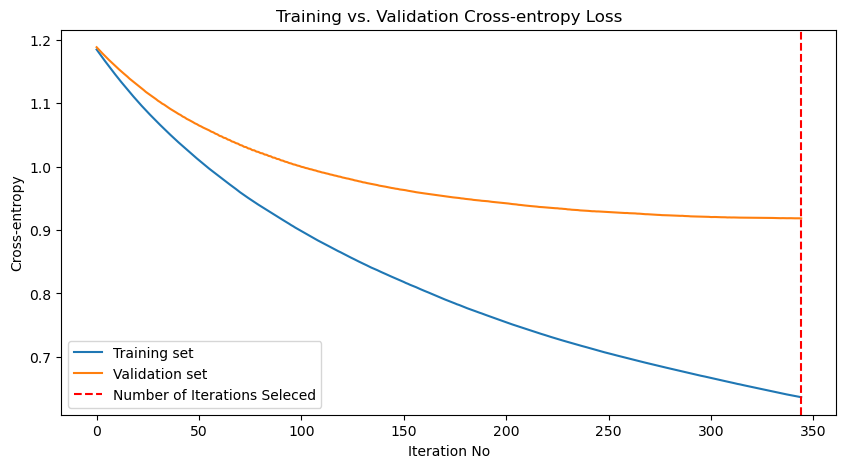

In [19]:
new_gbor.plot_cross_entropy_loss()